# Import libraries and data upload

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder

In [352]:
train = pd.read_csv(r'C:\Users\USER\OneDrive\Documents\Property_prices_predictions\train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Data cleaning

In [353]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [354]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [355]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

The dataset contains 1,460 residential property records and 81 features describing physical attributes, quality ratings, amenities, and location characteristics, along with the final sale price. There is a mix of numerical variables and categorical variables. A noticeable portion of the missing data is concentrated in features related to optional property elements such as basements, garages, masonry veneer, pools, and fences. This pattern indicates that the missingness is largely structural rather than random data loss. The descriptive statistics also show substantial variation in square footage and overall quality ratings, suggesting that the dataset captures a wide range of housing market segments—from small, lower-quality properties to large, high-end homes. This variation is essential for distinguishing price drivers in subsequent analysis.

### Missigness

In [356]:
((train.isna().sum().sort_values(ascending=False)) / len(train) * 100).head(25)

# drop columns with greater than 50% NaN
to_drop = ['Fence','Alley','MiscFeature','PoolQC']
train.drop(columns=[c for c in to_drop if c in train.columns], inplace=True)

def fill_missing(column, value):
    if column in train.columns:
        train[column] = train[column].fillna(value)
        print(f"Filled {column} with {value}")
    else:
        print(f"{column} not in DataFrame")

### Missingness in FireplaceQu

In [357]:
if 'FireplaceQu' in train.columns:
    train['FireplaceQu'] = train['FireplaceQu'].fillna("Zero")

The feature `FireplaceQu` describes the quality of fireplaces in each house. The missing values in FireplaceQu are not due to data loss, but because many houses simply do not contain a fireplace. To preserve the meaning of this information, the missing entries were replaced with the category **"Zero"**, indicating the absence of a fireplace. This ensures that the model can differentiate between homes with fireplaces (of varying quality) and homes without fireplaces at all, rather than interpreting the missing values as unknown. This approach retains the structural information and prevents misinterpretation during modeling.

### Missingness in GarageFinish, GarageQual, GarageCond, GarageYrBlt, GarageType

In [358]:
no_garage = train['GarageType'].isna()

garage_cat_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cat_cols:
    if col in train.columns:
        train[col] = train[col].fillna("NF")

if 'GarageYrBlt' in train.columns:
    train.loc[~no_garage & train['GarageYrBlt'].isna(), 'GarageYrBlt'] = train.loc[~no_garage, 'YearBuilt']
    train.loc[no_garage, 'GarageYrBlt'] = 0


The set of garage-related features contained missing values primarily because some houses in the dataset do not have a garage. These missing values are therefore structural. To preserve this information, a new category "NF" was assigned to the corresponding categorical columns. For `GarageYrBlt`, where the construction year was missing but the house had a garage, the value was replaced with the house’s `YearBuilt`, ensuring logical consistency. For properties without a garage, `GarageYrBlt` was set to 0. This approach prevents misleading interpretations during modeling by clearly distinguishing between houses with and without garages, while maintaining accurate chronological information where applicable.

### Missingness in Bsmt

In [359]:
bsmt_cat = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for col in bsmt_cat:
    if col in train.columns:
        train[col] = train[col].fillna("NF")

if 'BsmtExposure' in train.columns:
    bsmt_exp_mode = train.loc[train['BsmtExposure'] != "NF", 'BsmtExposure'].mode()[0]
    train.loc[(train['BsmtExposure'] == "NF") & (train['TotalBsmtSF'] > 0), 'BsmtExposure'] = bsmt_exp_mode

if 'BsmtFinType2' in train.columns:
    bsmt_fin2_mode = train.loc[train['BsmtFinType2'] != "NF", 'BsmtFinType2'].mode()[0]
    train.loc[(train['BsmtFinType2'] == "NF") & (train['TotalBsmtSF'] > 0), 'BsmtFinType2'] = bsmt_fin2_mode

Several basement-related features had missing values. The missingness here is structural: many homes in the dataset do not have basements. To correctly represent this, all basement-related categorical features were filled with the label NF.

However, a small number of records showed isolated missing values in `BsmtExposure` and `BsmtFinType2` even when a basement was present. These cases were genuine unknowns rather than absence of a basement. For those, the **mode** of each respective feature was used to fill the values. 

This strategy ensures that houses *without* basements are clearly distinguished from houses *with* basements.

### Missingness in Electrical

In [360]:
Electrical_mode = train['Electrical'].mode()[0]
train.loc[1379 , 'Electrical']= Electrical_mode

The `Electrical` feature had only one missing value across the dataset. Because this feature represents the type of electrical system in the house, and nearly all records share the same common category, the missing value here is not structural but simply an isolated omission. To maintain consistency without distorting the distribution, the missing value was replaced with the **mode** (the most frequently occurring category). This preserves the original data pattern and avoids introducing any unintended bias.

### Missingness in MasVnrType, MasVnrArea

In [361]:
if 'MasVnrType' in train.columns:
    train['MasVnrType'] = train['MasVnrType'].fillna("None")

if 'MasVnrArea' in train.columns:
    train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

The masonry veneer features describe whether a house has an exterior masonry finish and, if so, its type and size. Many houses in the dataset do not have masonry veneer, meaning the missingness here is structural rather than accidental. To capture this correctly, missing values in `MasVnrType` were replaced with the category "None", indicating no masonry veneer is present. For `MasVnrArea`, which measures the size of the veneer, missing values were filled with its median value, reflecting that non-veneer homes naturally have an area close to zero. This preserves the distinction between homes that feature brick or stone work and those with standard exterior siding, allowing the model to appropriately account for veneer as a quality and aesthetic upgrade.

### Missingness in LotFrontage

In [362]:
Lot_mask = []
for i in train.columns :
    if i.startswith("Lot"):
        Lot_mask.append(i)

Lot_mask= train[Lot_mask]
Lot_mask.isna().sum()

LotFrontage    259
LotArea          0
LotShape         0
LotConfig        0
dtype: int64

There is no reliable way to determine the LotFrontage value, so we'll fill it with the mean, since it is normally distributed.

In [363]:
if {'LotFrontage','Neighborhood'}.issubset(train.columns):
    nb_med = train.groupby('Neighborhood')['LotFrontage'].transform('median')
    train['LotFrontage'] = train['LotFrontage'].fillna(nb_med)
    train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

The `LotFrontage` feature represents the linear feet of property frontage connected to a street. The missing values in this column are not random — homes in different neighborhoods tend to have characteristic lot sizes and frontage patterns. To preserve this local structure, missing values were first imputed using the median LotFrontage within each Neighborhood, ensuring that the replacement reflects typical lot dimensions for that specific area. Any remaining gaps were then filled using the overall mean.

In [364]:
(train.isna().sum().sort_values().tail(10) / len(train)) * 100

EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
dtype: float64

Finally, there are no missing values remaining in the dataset.

## Duplicates

In [365]:
train.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset.

# EDA

## Univeriate

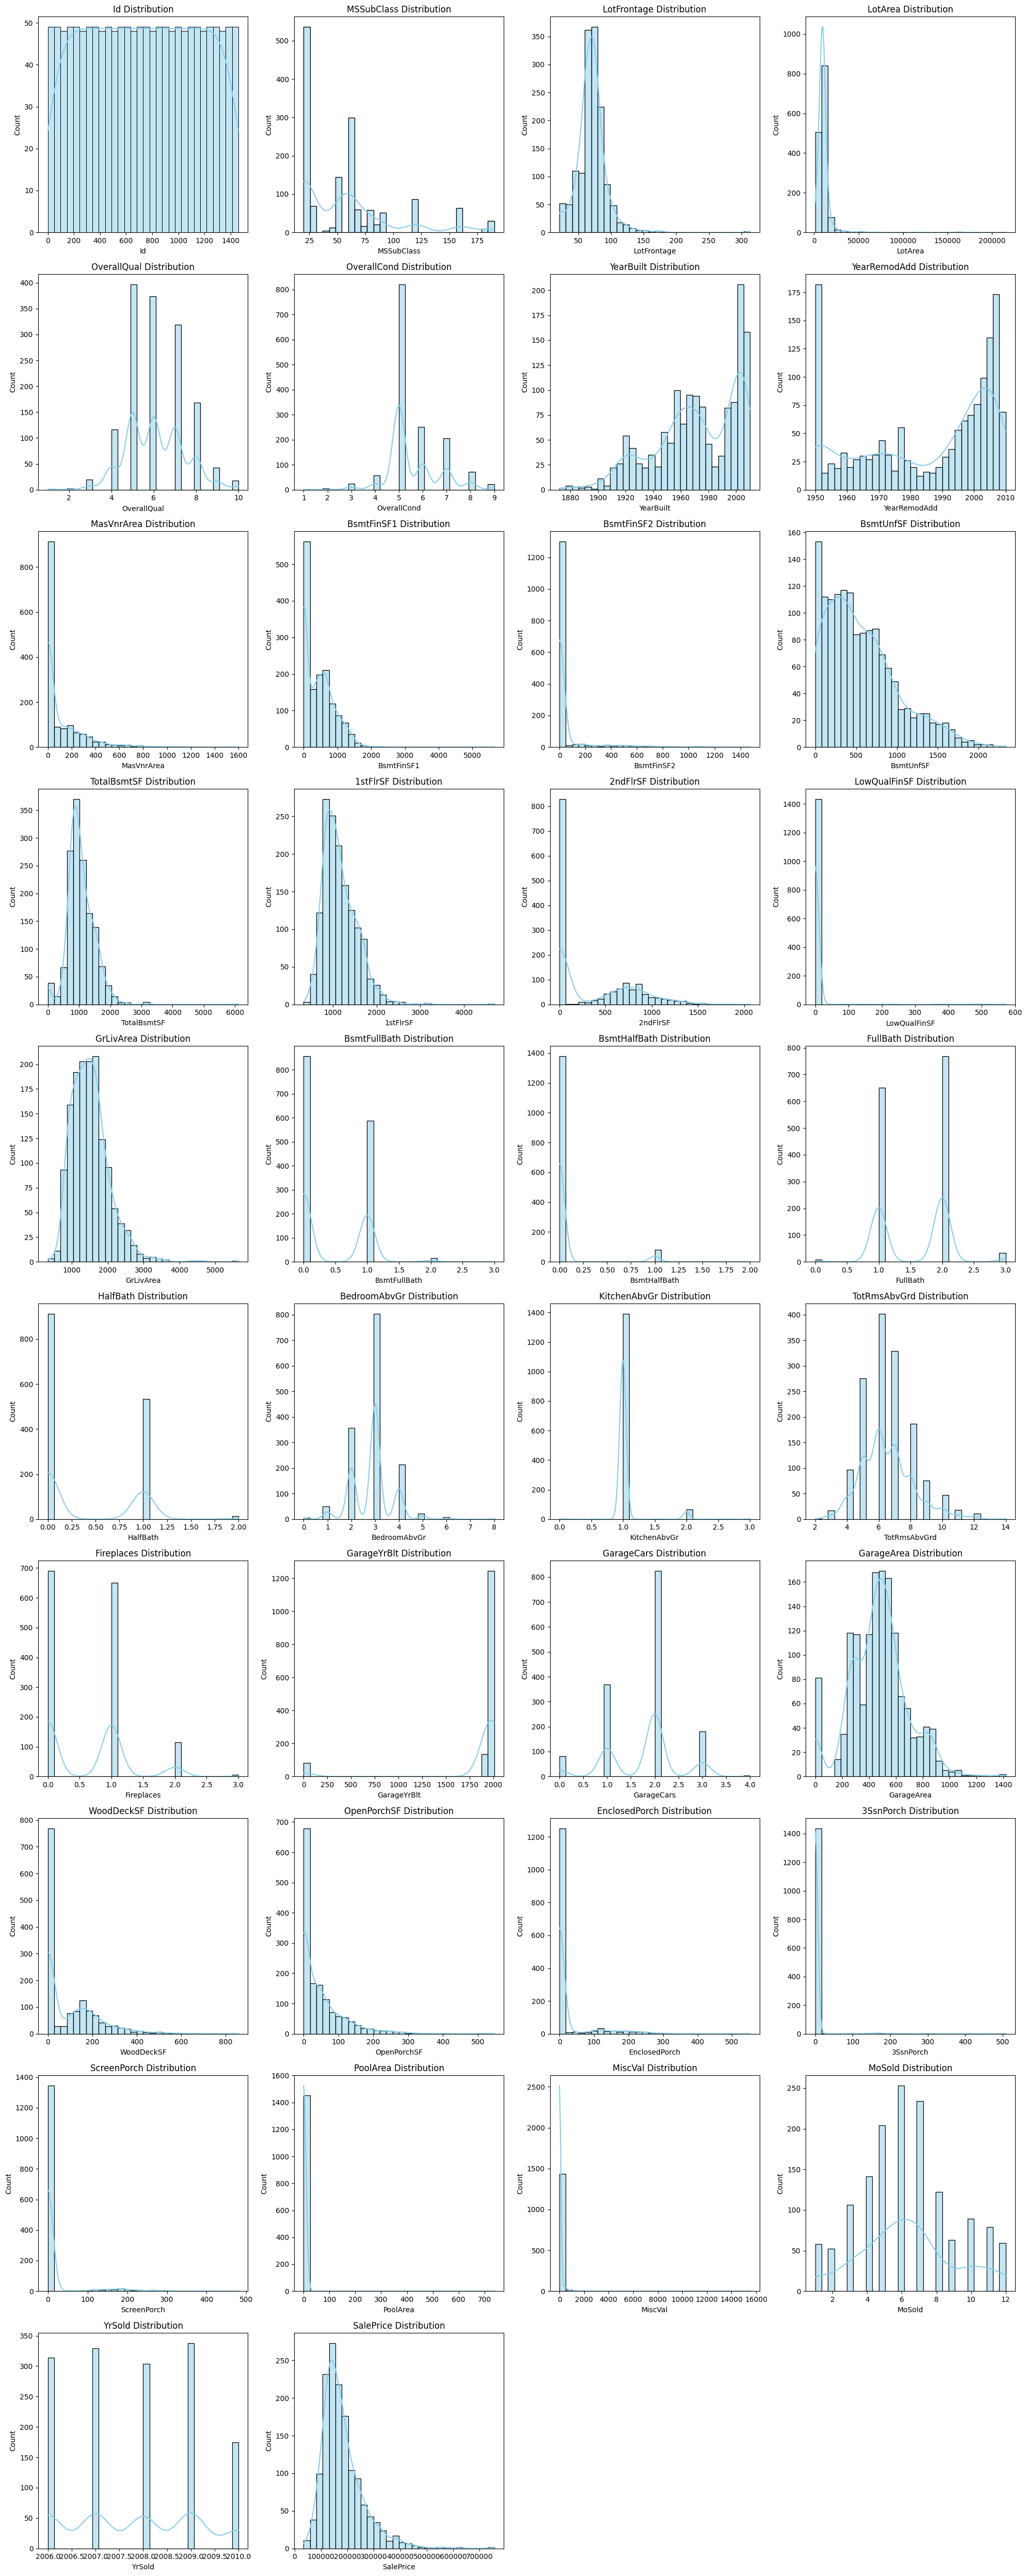

In [366]:
# numeric columns distribution
num_cols = train.select_dtypes(include=np.number).columns.tolist()
cols_per_row = 4
num_plots = len(num_cols)
rows = int(np.ceil(num_plots / cols_per_row))

plt.figure(figsize=(20, 5 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(train[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.tight_layout()

plt.show()

The numerical features in the dataset display a wide range of distributions, reflecting the diversity in house characteristics. Key structural variables such as OverallQual, OverallCond, and the number of bedrooms exhibit near-categorical patterns, suggesting that these ratings were assigned using discrete scoring systems. Variables related to house size, including LotArea, GrLivArea, TotalBsmtSF, and 1stFlrSF, are positively skewed, indicating that most homes are moderately sized while a small number of houses are significantly larger. This long-tailed behavior aligns with real estate market trends where larger luxury homes are less common but priced substantially higher.

Financial and amenity-related variables such as PoolArea, MiscVal, 3SsnPorch, and LowQualFinSF show extreme zero inflation, meaning that most houses do not have these features. This suggests these features will have limited predictive power unless transformed or converted into binary indicators. The target variable, SalePrice, is also right-skewed, implying that a log-transform may be effective during modeling to stabilize variance and improve linearity. Overall, the univariate analysis highlights the presence of skewness, outliers, and zero-heavy features.

In [367]:
# Check skewness and kurtosis
skew_kurt = pd.DataFrame({
    'Skewness': train[num_cols].apply(lambda x: skew(x.dropna())),
    'Kurtosis': train[num_cols].apply(lambda x: kurtosis(x.dropna()))
}).sort_values(by='Skewness', ascending=False)

skew_kurt.head(20)

Skewness    Kurtosis
MiscVal        24.451640  698.600840
PoolArea       14.813135  222.500507
LotArea        12.195142  202.543793
3SsnPorch      10.293752  123.235177
LowQualFinSF    9.002080   82.945932
KitchenAbvGr    4.483784   21.454627
BsmtFinSF2      4.250888   20.040415
ScreenPorch     4.117977   18.371874
BsmtHalfBath    4.099186   16.336436
EnclosedPorch   3.086696   10.390972
MasVnrArea      2.674865   10.102612
OpenPorchSF     2.361912    8.457180
LotFrontage     2.210685   20.026234
SalePrice       1.880941    6.509812
BsmtFinSF1      1.683771   11.076090
WoodDeckSF      1.539792    2.978604
TotalBsmtSF     1.522688   13.201042
MSSubClass      1.406210    1.570675
1stFlrSF        1.375342    5.722076
GrLivArea       1.365156    4.874266

The skewness analysis revealed that several numerical variables exhibit strong right-skewness, particularly amenities that are rare in most homes such as PoolArea, 3SsnPorch, LowQualFinSF, and MiscVal. These features are zero-inflated and are better treated as binary indicators rather than continuous measures. Additionally, size-related variables such as TotalBsmtSF, 1stFlrSF, and GrLivArea are moderately skewed due to the presence of a small number of significantly large homes. To stabilize variance and improve model performance, these variables will benefit from log transformation during the modeling stage. The target variable, SalePrice, is also right-skewed.

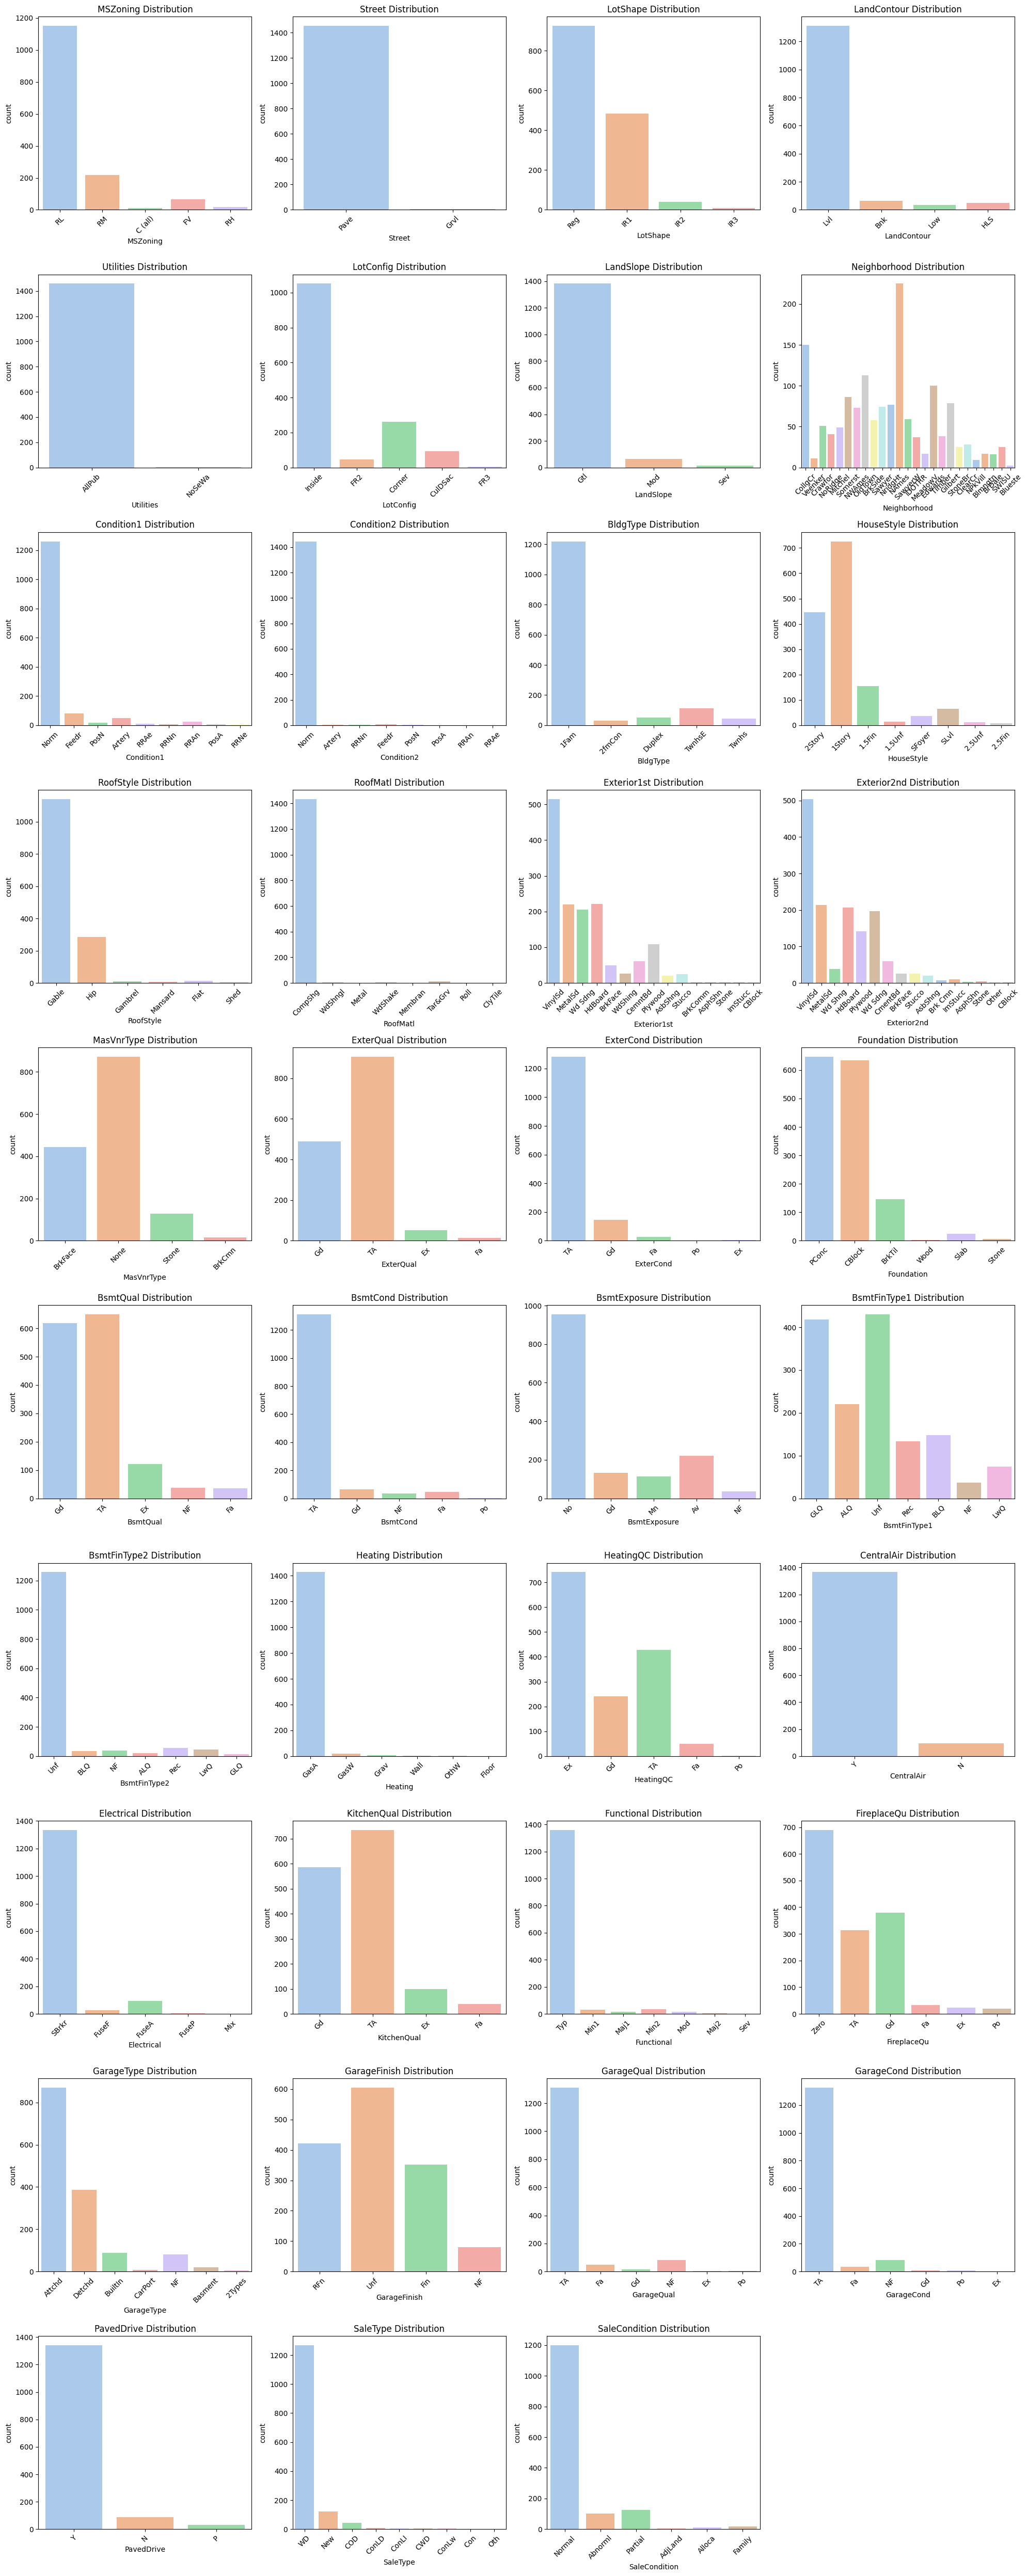

In [368]:
# categorical columns
cat_cols = train.select_dtypes(include=['object']).columns
cols_per_row = 4
num_plots = len(cat_cols)
rows = int(np.ceil(num_plots / cols_per_row))

plt.figure(figsize=(20, 5 * rows))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.countplot(data=train, x=col, hue=col, palette='pastel', legend=False)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

The categorical feature distributions show clear patterns in housing preferences and construction norms within the dataset. Many categories are highly imbalanced, meaning certain building characteristics are far more common than others. For example, most homes are located in residential zones (MSZoning = RL) and are accessed by paved streets, reflecting typical suburban development patterns. Neighborhood distribution varies widely, with a few neighborhoods contributing a large share of homes, indicating potential location-driven pricing differences to be explored.

Quality-related categorical variables, such as Exterior, KitchenQual, BsmtQual, and ExterCond, show that most homes fall within average to good quality ranges, with extreme poor or excellent ratings being relatively rare. This suggests the housing stock is mostly mid-range in condition. Features such as PoolArea, 3SsnPorch, and certain garage attributes also display strong imbalance, where the majority of homes lack these amenities entirely. These features will likely require binary encoding or careful handling during modeling to avoid noise.

Overall, the categorical distributions highlight the importance of location, overall condition, and house style, while also signaling that many amenity features are sparsely represented. These imbalances indicate where feature simplification, grouping, or ordinal encoding will improve model interpretability and performance.

# Outlier handling

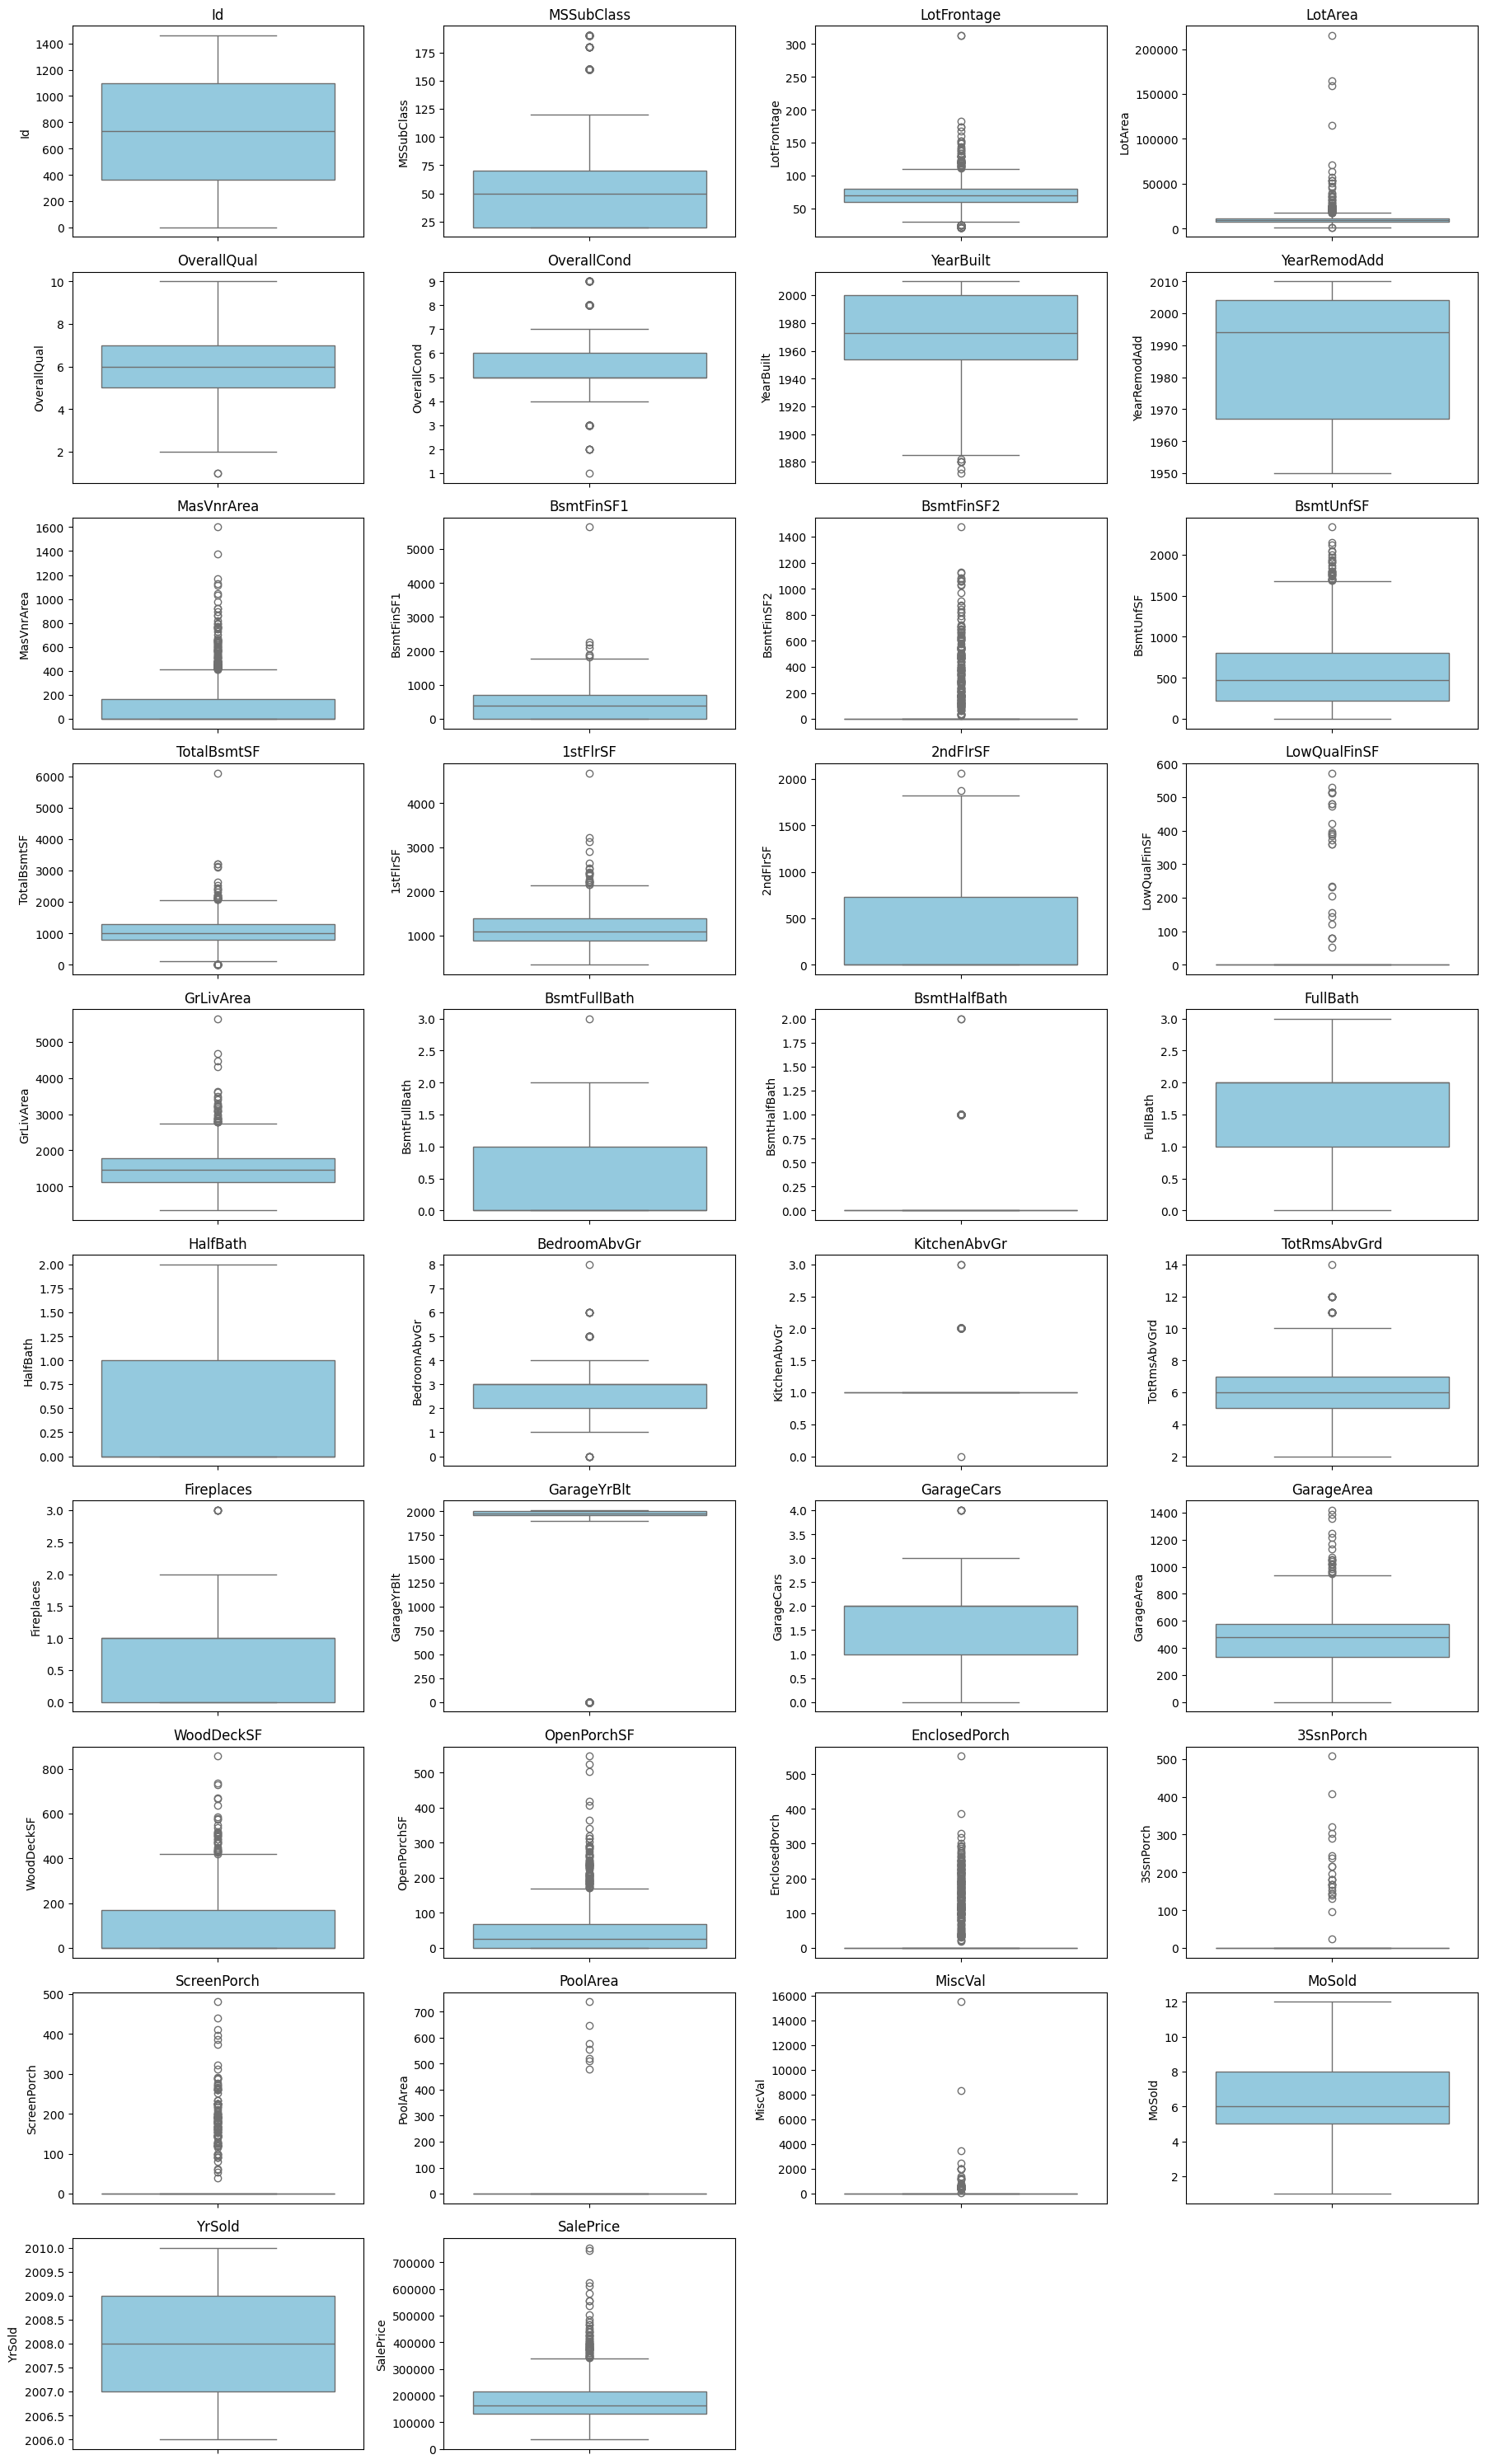

In [369]:
import math

num_cols = train.select_dtypes(include=np.number).columns.tolist()

cols = 4
rows = math.ceil(len(num_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=train[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# Hide unused axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [370]:
# GrLivArea
train = train[~((train['GrLivArea'] > 4500) & (train['SalePrice'] < 700000))]

# IQR removal
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    before = df.shape[0]
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    after = df.shape[0]
    
    print(f"{col}: Removed {before - after} rows")
    return df

iqr_cols = [
    'LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', 'GrLivArea', 'GarageArea', 'TotalSF'
]

for col in iqr_cols:
    if col in train.columns:
        train = remove_outliers(train, col)

# Winsorize extreme features
cap_cols = ['WoodDeckSF', 'OpenPorchSF', 'MasVnrArea', 'BsmtFinSF2']

for col in cap_cols:
    if col in train.columns:
        upper_cap = train[col].quantile(0.99)
        train[col] = np.where(train[col] > upper_cap, upper_cap, train[col])

LotArea: Removed 66 rows
BsmtFinSF1: Removed 5 rows
BsmtUnfSF: Removed 30 rows
TotalBsmtSF: Removed 53 rows
1stFlrSF: Removed 6 rows
GrLivArea: Removed 26 rows
GarageArea: Removed 6 rows


Outliers were examined visually using boxplots and assessed statistically using the Interquartile Range (IQR) method. Several continuous variables displayed strong right-skew and extreme high values, particularly those related to property size such as LotArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea, and the engineered TotalSF feature. Because extreme values in these features can distort model training and inflate error, we removed outliers falling beyond 1.5 × IQR for these variables. Additionally, we removed unusually large homes with very low sale prices in the GrLivArea feature. For variables with many zeros and a few extremely large values (e.g., MasVnrArea, WoodDeckSF, OpenPorchSF, BsmtFinSF2), we capped extreme values at the 99th percentile instead of removing observations, in order to preserve dataset size and maintain underlying distribution patterns. Overall, this balanced strategy ensures that the dataset remains representative while reducing the influence of extreme, non-typical values on model performance.

## Biveriate analysis

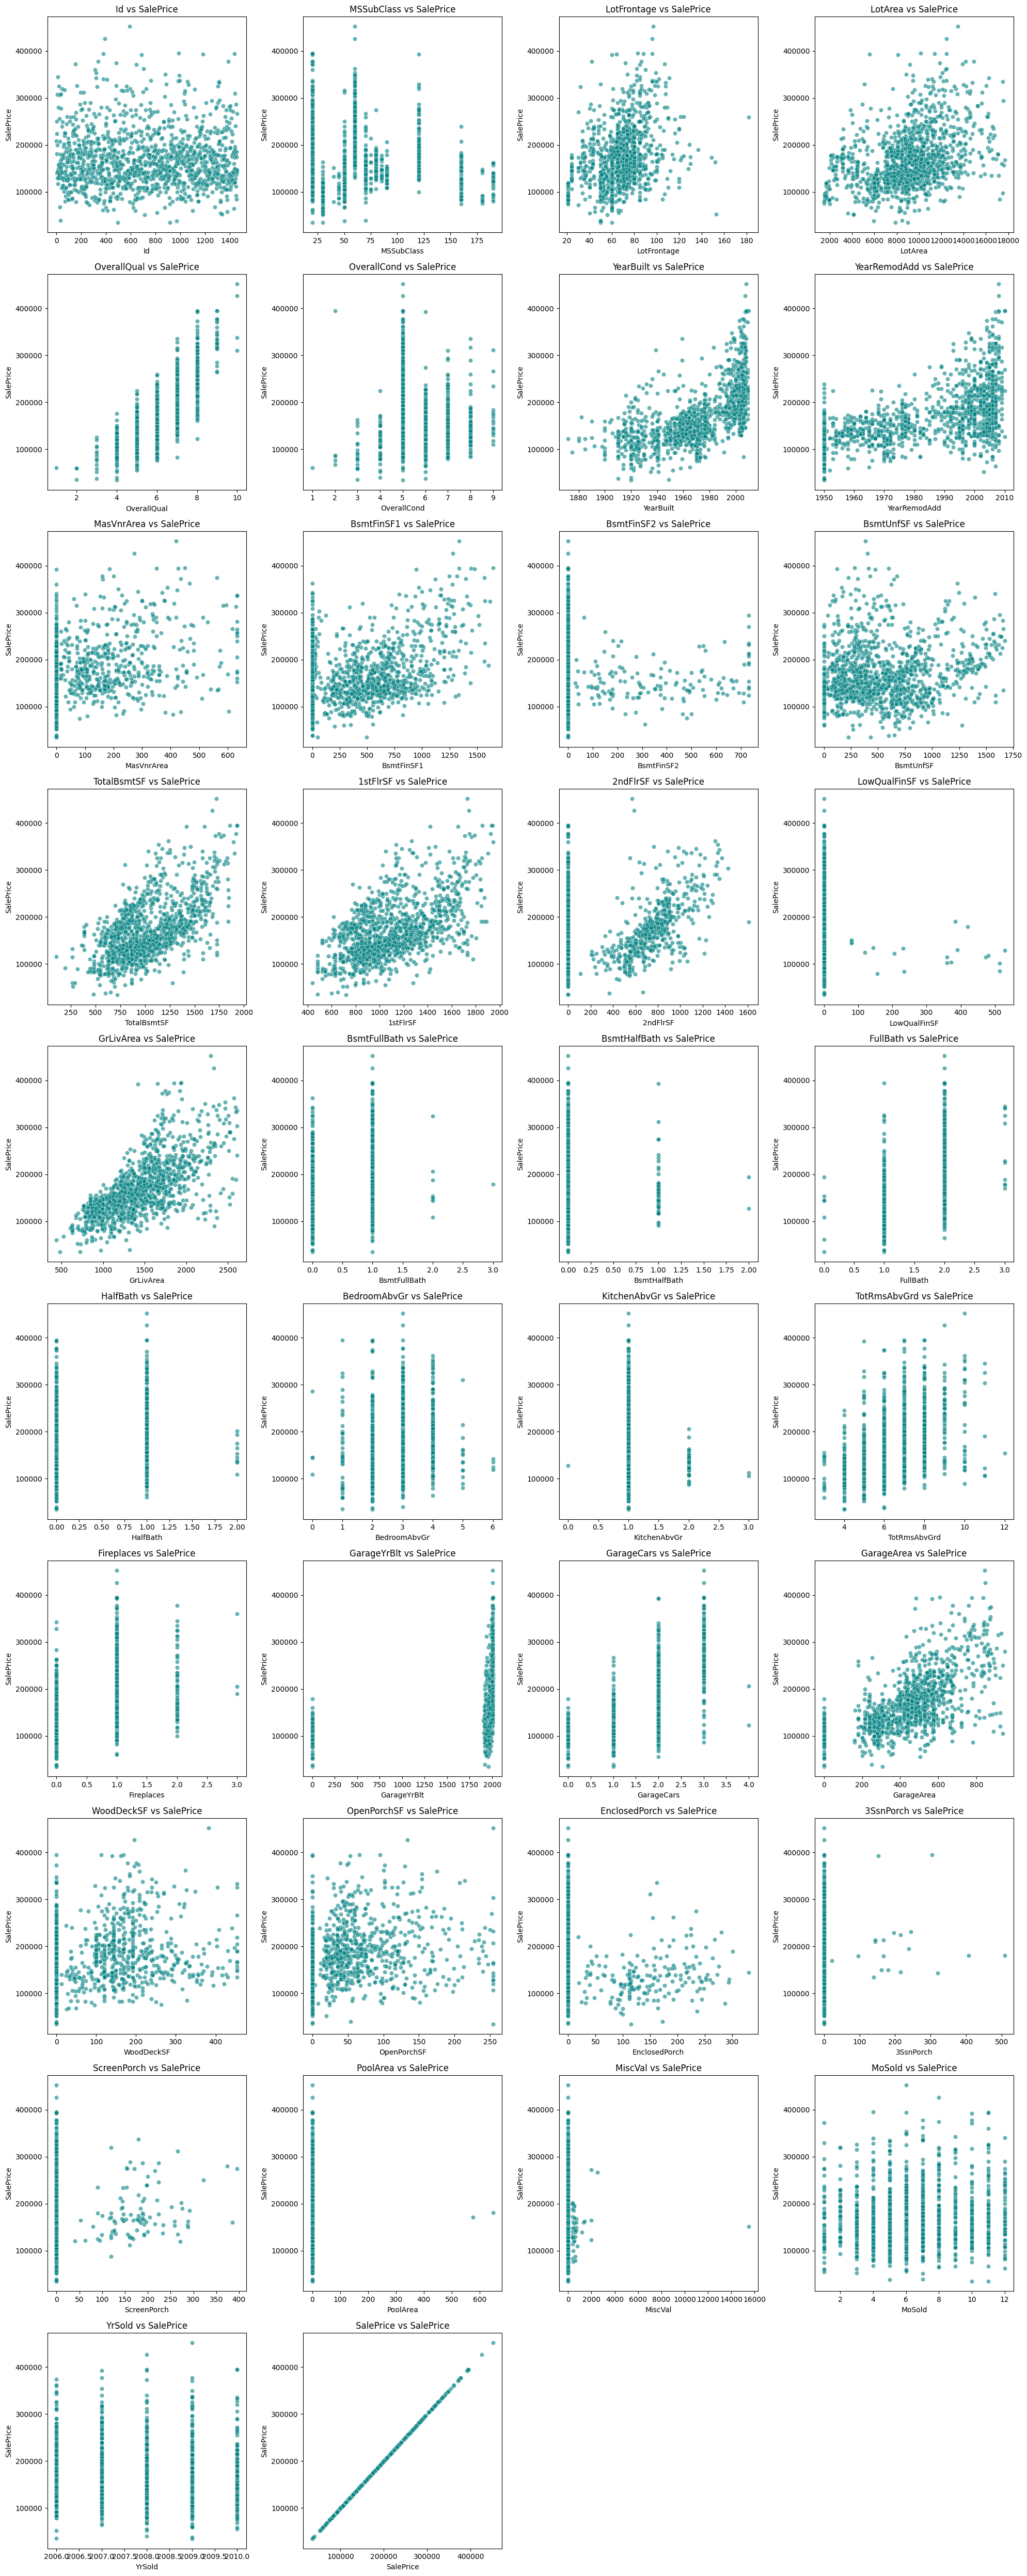

In [371]:
# Numerical vs Target
cols_per_row = 4
num_plots = len(num_cols)
rows = int(np.ceil(num_plots / cols_per_row))

plt.figure(figsize=(20, 5 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.scatterplot(data=train, x=col, y='SalePrice', color='teal', alpha=0.6)
    plt.title(f'{col} vs SalePrice')
plt.tight_layout()
plt.show()

The bivariate analysis shows clear and meaningful relationships between several numerical features and the sale price of homes. The strongest positive relationships appear with size and quality-related variables. GrLivArea, TotalBsmtSF, 1stFlrSF, and GarageArea show upward trends, indicating that larger homes and properties with more finished living space generally command higher prices. This aligns with real-world expectations: more usable area typically increases home value. However, the presence of a few extremely large houses introduces visible skew, reinforcing the importance of later applying log transformations to reduce the influence of these outliers during modeling.

OverallQual stands out as the most influential variable, displaying a noticeable step-like increase in price as quality ratings rise. This suggests that improvements in materials, craftsmanship, and finish levels significantly increase property value. YearBuilt and YearRemodAdd also show upward patterns, indicating that newer or recently renovated homes are more valuable, though the relationship is more moderate compared to quality and size.

Several variables such as PoolArea, 3SsnPorch, and MiscVal show almost no pattern with SalePrice due to the predominance of zeros, confirming that these features should be simplified to binary indicators. Bathroom counts and fireplaces show some positive price association but with weaker patterns compared to square footage and quality measures.

In [372]:
# Features simplified into binary has/has not indicators
binary_features = ['MiscVal', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'BsmtFinSF2', 'BsmtHalfBath']

for col in binary_features:
    if col in train.columns:
        train[col] = (train[col] > 0).astype(int)

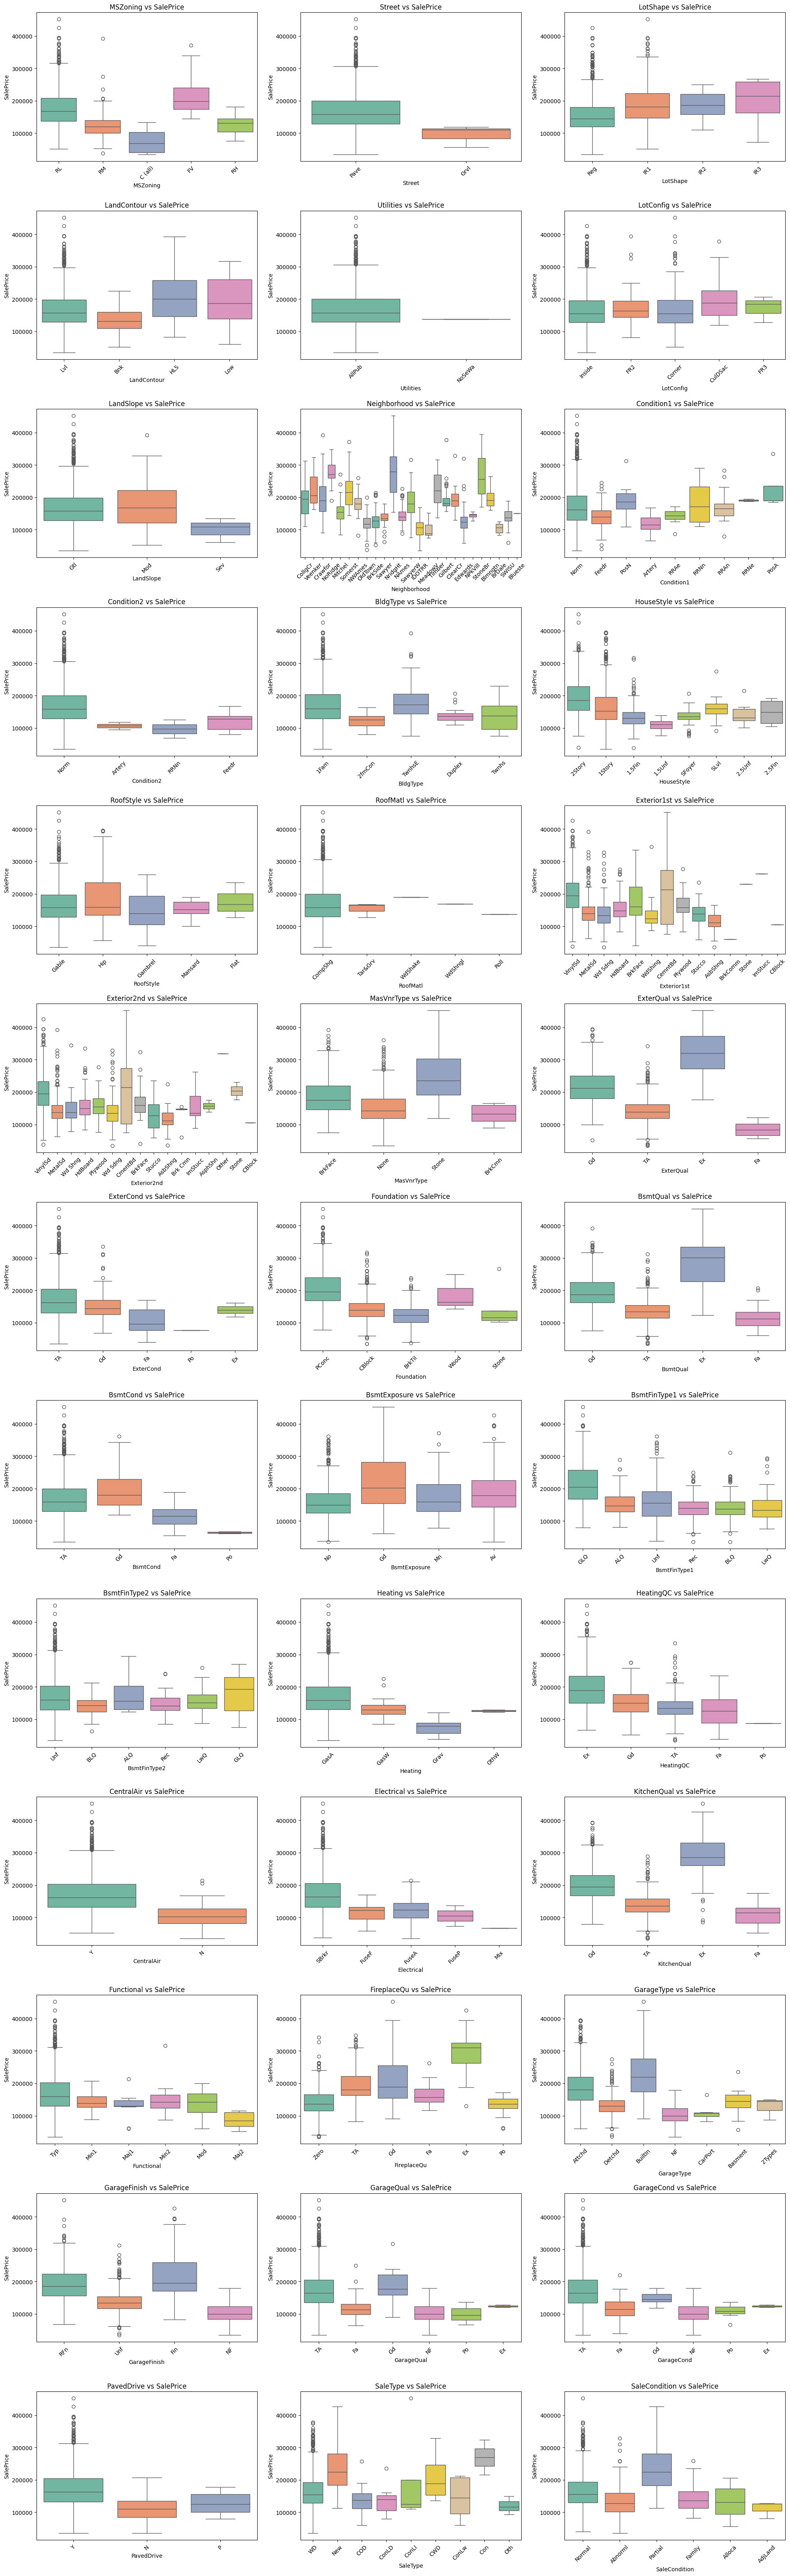

In [373]:
# categorical vs SalePrice
cols_per_row = 3
num_plots = len(cat_cols)
rows = int(np.ceil(num_plots / cols_per_row))

plt.figure(figsize=(20, 5 * rows))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(data=train, x=col, y='SalePrice', hue=col, palette='Set2', legend=False)
    plt.title(f'{col} vs SalePrice')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

The bivariate analysis of categorical features against SalePrice highlights several patterns in how structural quality, location, and property characteristics influence home values. Neighborhood stands out as one of the strongest categorical predictors of price, with certain areas such as *StoneBr*, *NridgHt*, and *NoRidge* consistently associated with significantly higher sale prices. This suggests a clear location-based premium in the housing market. Conversely, neighborhoods like *MeadowV* and *IDOTRR* show noticeably lower price ranges, indicating market segmentation by locality.

Quality-related categorical variables also show meaningful gradients. For instance, homes with higher KitchenQual and ExterQual ratings show higher SalePrice distributions. This supports the pattern observed earlier that material and finish quality strongly influence perceived and market value. Similarly, BsmtQual and GarageQual show a positive association with price, although the effect is less pronounced than for above-ground quality indicators.

Some categorical variables showed limited or no variation in relation to SalePrice. For example, Utilities and Street show almost no discriminatory power because nearly all homes share the same category. These features offer little value and can be removed to simplify the model without information loss. RoofStyle, Heating type, and Functional categories also showed only weak price differentiation, suggesting these features carry less predictive weight.

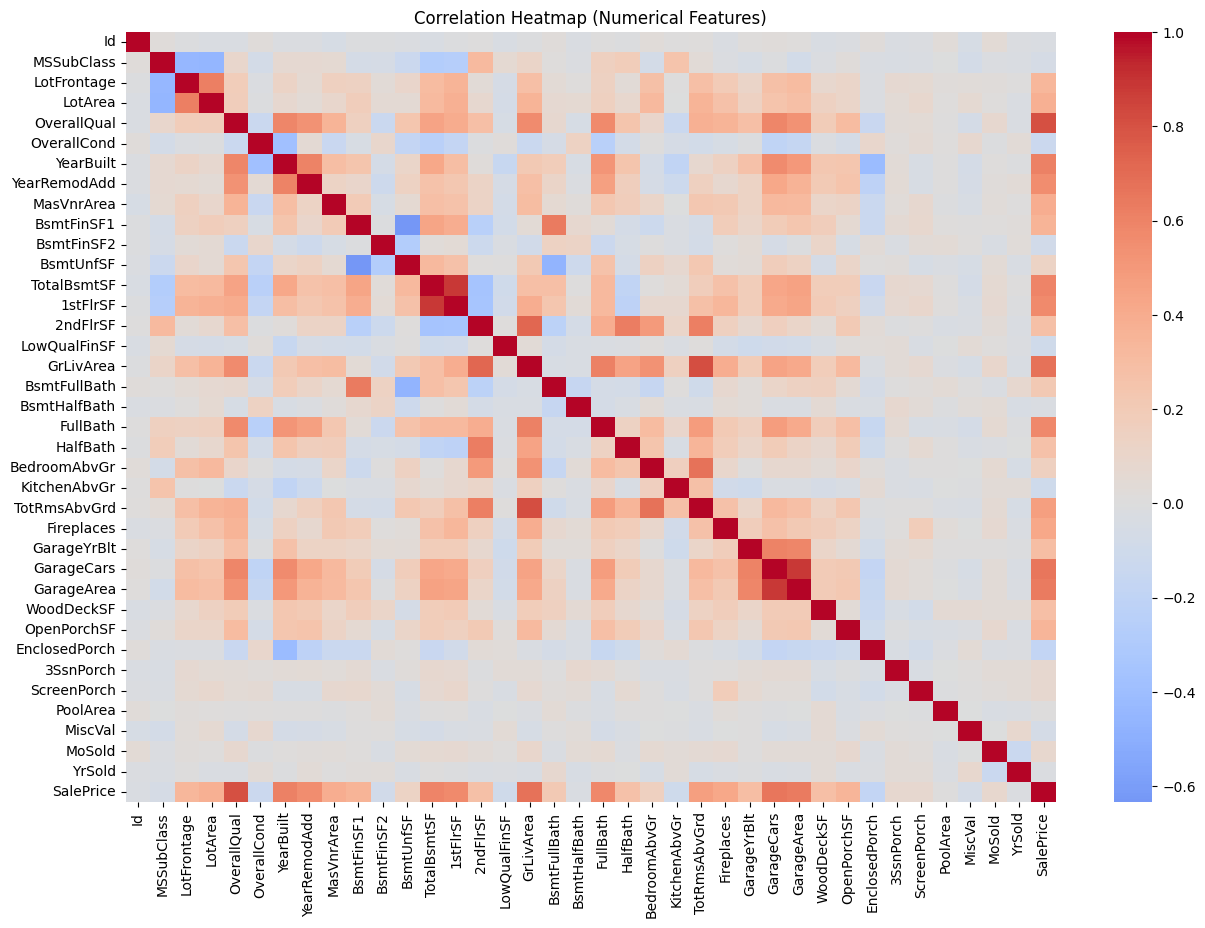

In [374]:
# correlation matrix
corr = train.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

In [375]:
corr.SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.802557
GrLivArea        0.675159
GarageCars       0.656674
GarageArea       0.631551
YearBuilt        0.612143
TotalBsmtSF      0.595117
FullBath         0.583877
1stFlrSF         0.566400
YearRemodAdd     0.555147
TotRmsAbvGrd     0.471698
Fireplaces       0.425236
MasVnrArea       0.394790
LotArea          0.377426
BsmtFinSF1       0.358776
OpenPorchSF      0.345428
LotFrontage      0.336315
GarageYrBlt      0.296604
WoodDeckSF       0.291412
2ndFlrSF         0.275339
HalfBath         0.267893
BsmtFullBath     0.217331
BedroomAbvGr     0.156169
BsmtUnfSF        0.130781
MoSold           0.081968
ScreenPorch      0.079173
3SsnPorch        0.073062
PoolArea         0.003973
YrSold          -0.020926
Id              -0.023199
BsmtHalfBath    -0.026356
MSSubClass      -0.055695
MiscVal         -0.064210
BsmtFinSF2      -0.085536
LowQualFinSF    -0.093725
KitchenAbvGr    -0.110197
OverallCond     -0.123500
EnclosedPorch   -0.181776
Name: SalePr

The correlation analysis shows that house quality and size are the strongest drivers of sale price. OverallQual has the highest positive correlation with SalePrice, followed by GrLivArea, GarageCars, GarageArea, TotalBsmtSF, and YearBuilt/YearRemodAdd, indicating that larger homes with better construction and more recent updates tend to sell for higher prices. Features such as KitchenAbvGr, LowQualFinSF, and EnclosedPorch show weak or negative correlations, suggesting they contribute little to price variation and may be less important in modeling. Additionally, several size-related features are strongly correlated with one another.

## Multivariate analysis

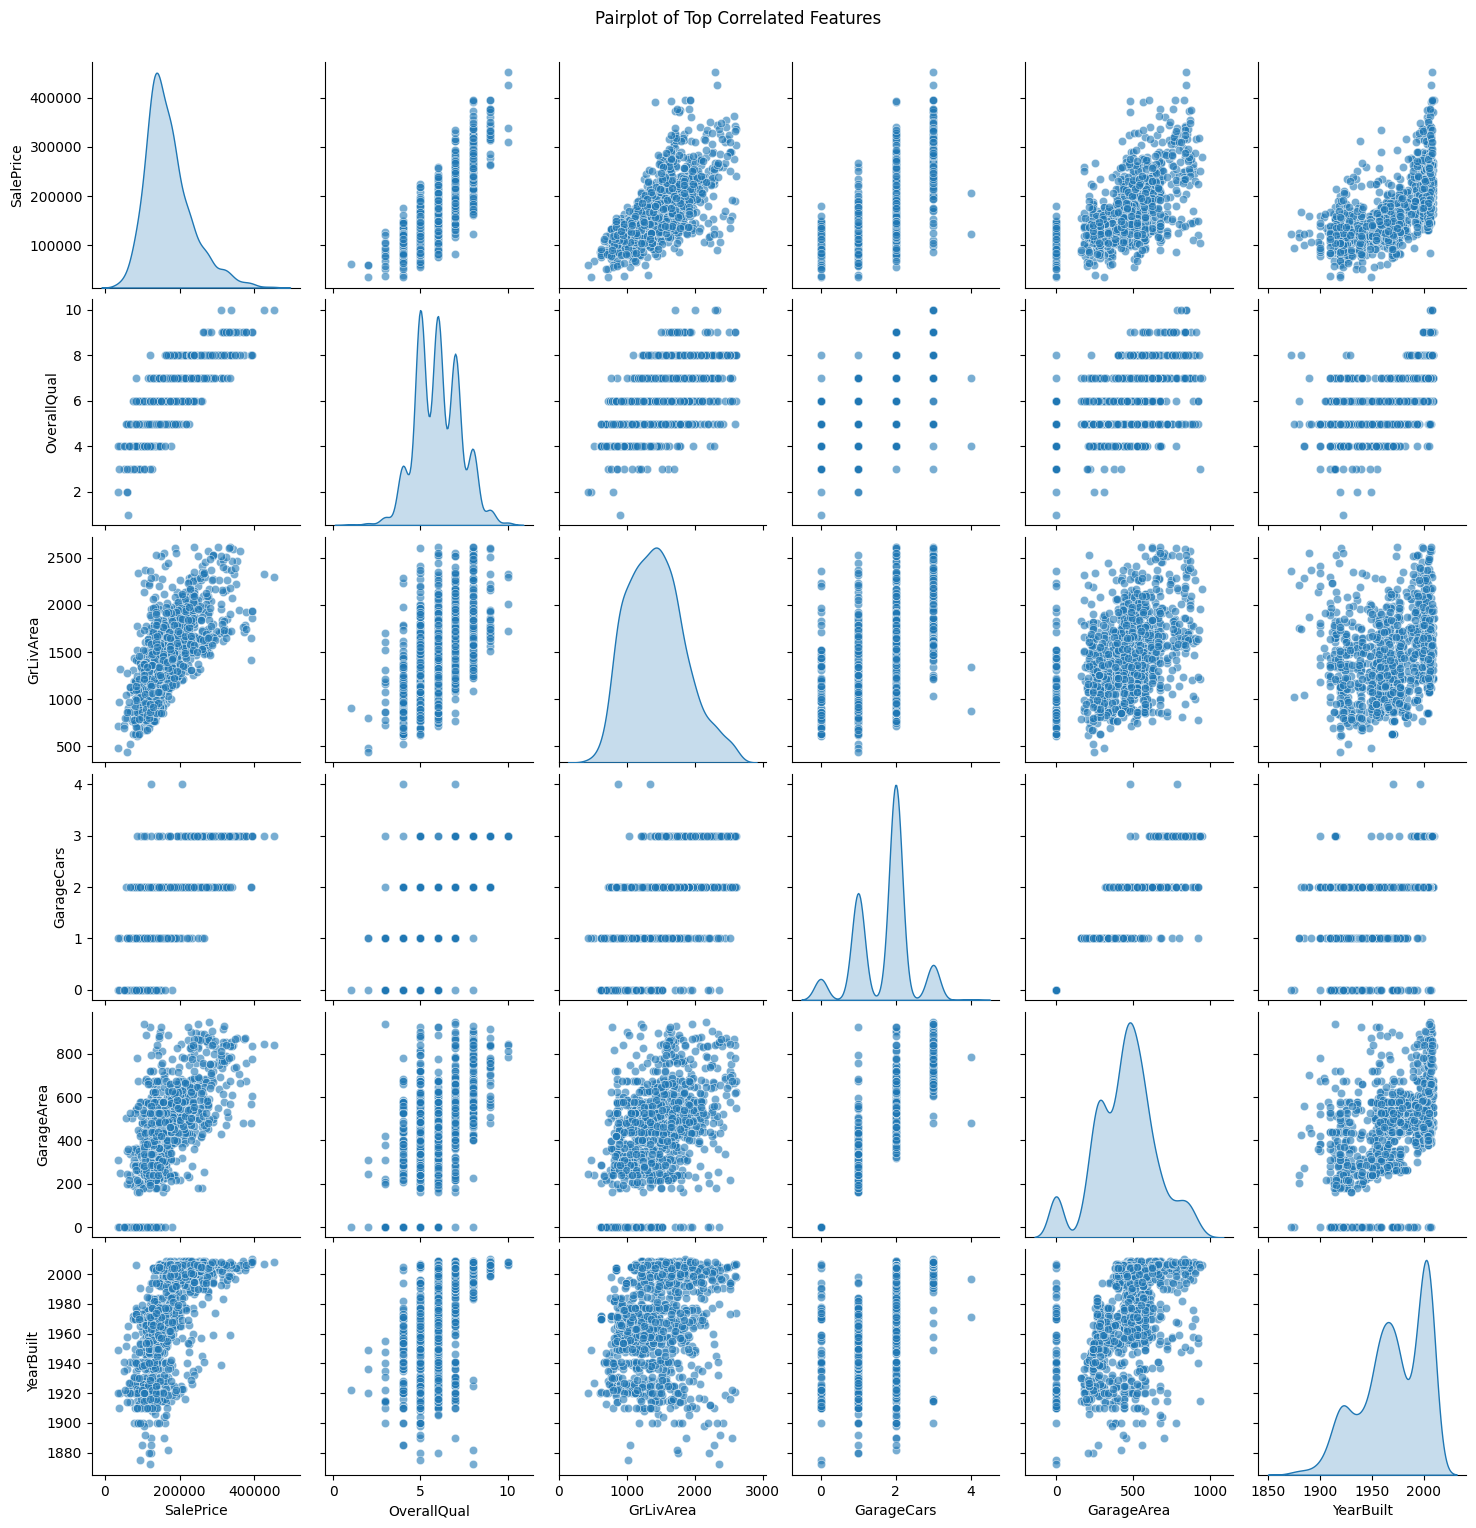

In [376]:
# Pairplot for top correlated numeric variables
corr_matrix = train.corr(numeric_only=True)

top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(6).index

sns.pairplot(train[top_corr], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Top Correlated Features', y=1.02)
plt.show()

The pairplot of the top correlated features (OverallQual, GrLivArea, GarageCars, GarageArea, YearBuilt, and SalePrice) reveals several key interaction patterns. Homes with higher OverallQual and larger GrLivArea consistently show higher SalePrice, confirming that size and build quality jointly drive value. Garage capacity and garage size also increase with SalePrice but show diminishing returns beyond a 2-car garage. YearBuilt has a positive relationship with SalePrice, indicating that newer homes generally sell for more, but the effect is weaker than size and quality. The plot also highlights strong collinearity between GrLivArea, TotalBsmtSF/TotalSF, GarageCars, and GarageArea, suggesting that these size-related variables may need to be carefully selected or combined to avoid multicollinearity in modeling.

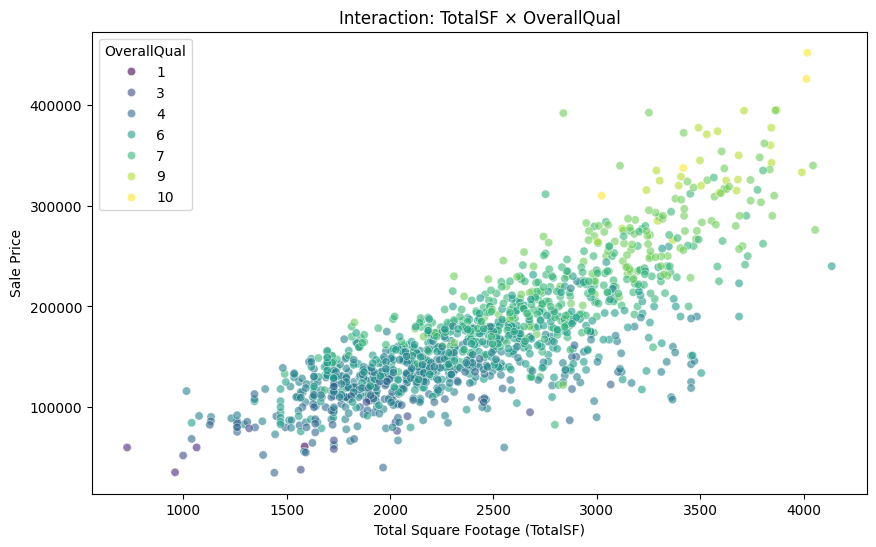

In [377]:
# Size × Quality Interaction
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=train,
    x='TotalSF',
    y='SalePrice',
    hue='OverallQual',
    palette='viridis',
    alpha=0.6
)
plt.title('Interaction: TotalSF × OverallQual')
plt.xlabel('Total Square Footage (TotalSF)')
plt.ylabel('Sale Price')
plt.show()

The relationship between house size and sale price depends strongly on quality. Larger homes only command higher prices when paired with higher OverallQual. Low-quality large homes do not sell for much more, but high-quality large homes sell at a premium. This means size and quality reinforce each other

C:\Users\USER\AppData\Local\Temp\ipykernel_19360\1161105782.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neigh_price.index, y=neigh_price.values, palette='Spectral')


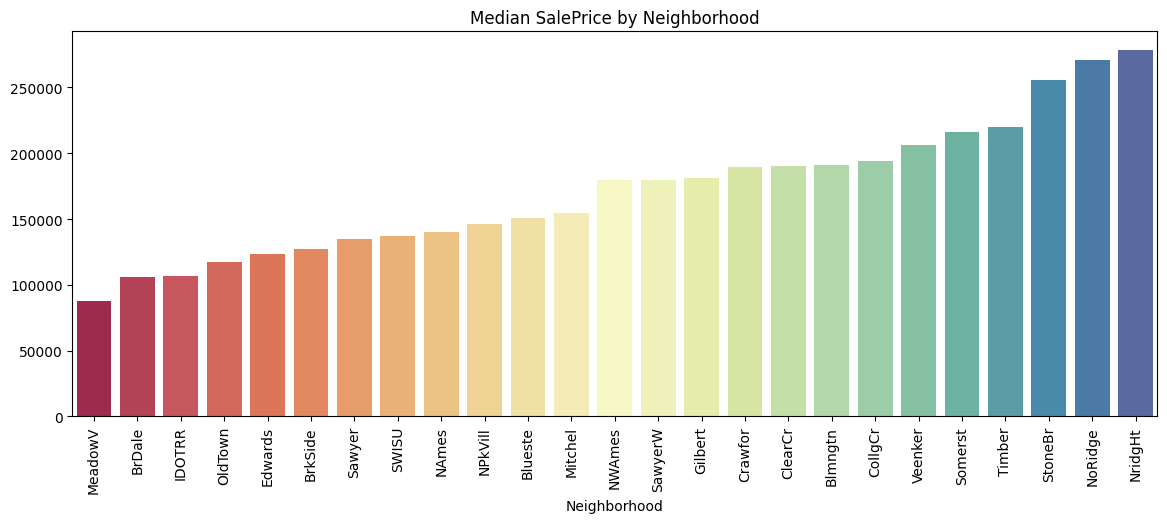

In [378]:
# Neighborhood Price Rankings
neigh_price = train.groupby("Neighborhood")["SalePrice"].median().sort_values()
plt.figure(figsize=(14,5))
sns.barplot(x=neigh_price.index, y=neigh_price.values, palette='Spectral')
plt.xticks(rotation=90)
plt.title("Median SalePrice by Neighborhood")
plt.show()

Neighborhood clearly impacts sale prices. Premium areas like NridgHt, NoRidge, and StoneBr have the highest values, while MeadowV and BrDale are the lowest. This confirms that location is a key driver of price, and we can encode it based on median SalePrice.

In [379]:
# Multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train[['TotalSF','GrLivArea','GarageCars','GarageArea','OverallQual','YearBuilt']].assign(const=1)
vif = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
vif

Feature          VIF
0      TotalSF     4.752972
1    GrLivArea     4.047941
2   GarageCars     5.325387
3   GarageArea     4.754031
4  OverallQual     2.362755
5    YearBuilt     1.882193
6        const  7322.343237

Moderate correlation exists among GarageCars, GarageArea, and TotalSF, but all VIF values are below 10. No severe multicollinearity detected.

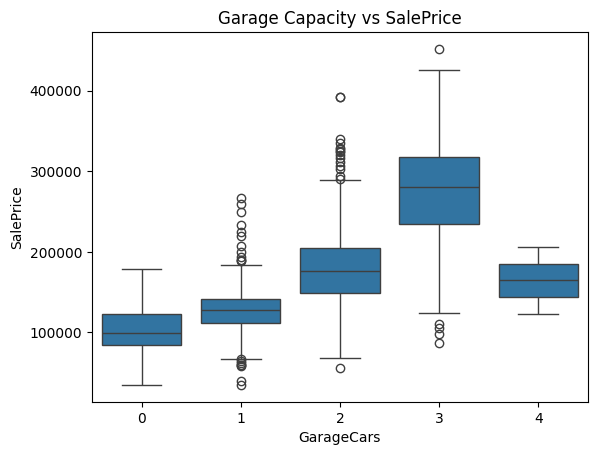

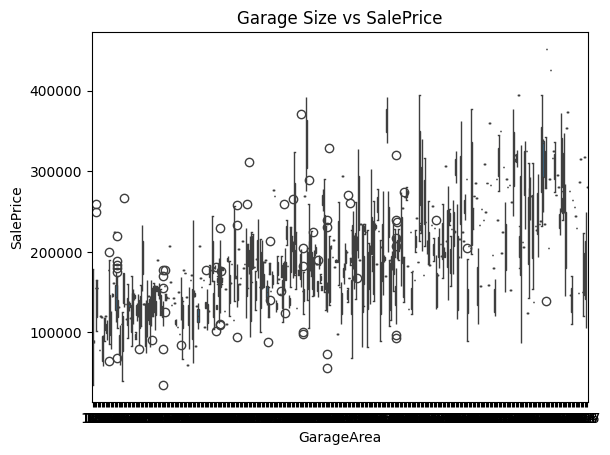

In [380]:
# Garage Size + Quality
sns.boxplot(data=train, x='GarageCars', y='SalePrice')
plt.title("Garage Capacity vs SalePrice")
plt.show()

sns.boxplot(data=train, x='GarageArea', y='SalePrice')
plt.title("Garage Size vs SalePrice")
plt.show()

Both garage capacity (GarageCars) and garage size (GarageArea) show a clear positive relationship with sale price — homes with larger or multiple-car garages sell for significantly more. However, the relationship becomes weaker beyond 3 cars, indicating diminishing returns on additional garage space.

## Encoding

In [381]:
# Ordinal Encoding
qual_mapping = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NF":0, "Zero":0}
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond', 'FireplaceQu']

for col in ordinal_cols:
    if col in train.columns:
        train[col] = train[col].fillna('NF').map(qual_mapping)

# One-Hot Encoding for remaining nominal columns
cat_cols = train.select_dtypes(include=['object']).columns
nominal_cols = [c for c in cat_cols if c not in ordinal_cols]
train = pd.get_dummies(train, columns=nominal_cols, drop_first=True)

# Feature engineering

In [382]:
# Total Square Footage
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# Total Bathrooms
train['Total_Bathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                               train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

# House Age Features
train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

# Quality × Size Interaction
train['OverallQualArea'] = train['OverallQual'] * train['TotalSF']
train["QualityScore"] = train["OverallQual"] * train["OverallCond"]
train["TotalPorch"] = train["OpenPorchSF"] + train["EnclosedPorch"] + train["ScreenPorch"] + train["3SsnPorch"]

# Feature selection

In [383]:
# Drop low-importance columns based on EDA findings
drop_cols = [
    'MiscVal', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr',
    'MoSold', 'OverallCond', 'EnclosedPorch', 'ScreenPorch',
    'Fence', 'Alley', 'MiscFeature', 'Utilities'
]
drop_prefixes = ['Fence_', 'Alley_', 'MiscFeature_', 'Utilities_']

to_drop = [c for c in train.columns if c in drop_cols or any(c.startswith(p) for p in drop_prefixes)]
train.drop(columns=to_drop, inplace=True, errors='ignore')

In [384]:
train.to_csv("processed_train.csv", index=False)